BIGMART SALES PREDICTION 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv(r"C:\Users\aangi\Downloads\Train.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
# Check for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
# filling missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

# Verify no missing values remain
df.isnull().sum()


C:\Users\aangi\AppData\Local\Temp\ipykernel_14792\2774937955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
C:\Users\aangi\AppData\Local\Temp\ipykernel_14792\2774937955.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


EDA ON DATASET

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

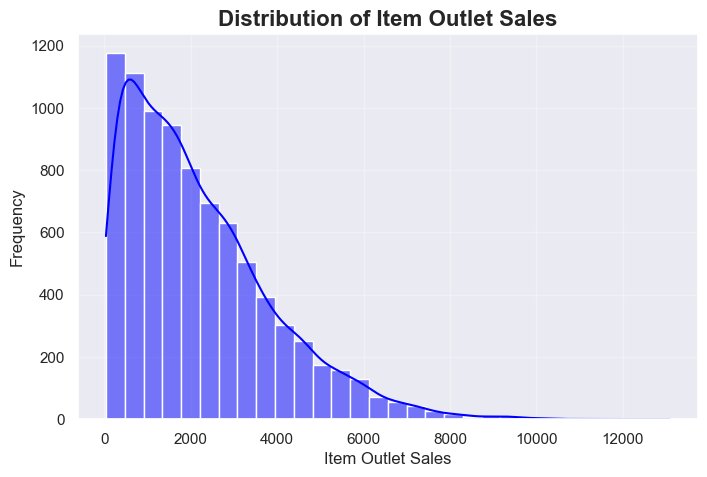

average sales: 2181.29
highest sales: 13086.9648
lowest sales: 33.29


In [30]:
# Target variable distribution:- item outlet sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Item Outlet Sales', fontsize=16, fontweight='bold')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print("average sales:", df['Item_Outlet_Sales'].mean().round(2))
print("highest sales:",df['Item_Outlet_Sales'].max())
print("lowest sales:",df['Item_Outlet_Sales'].min())

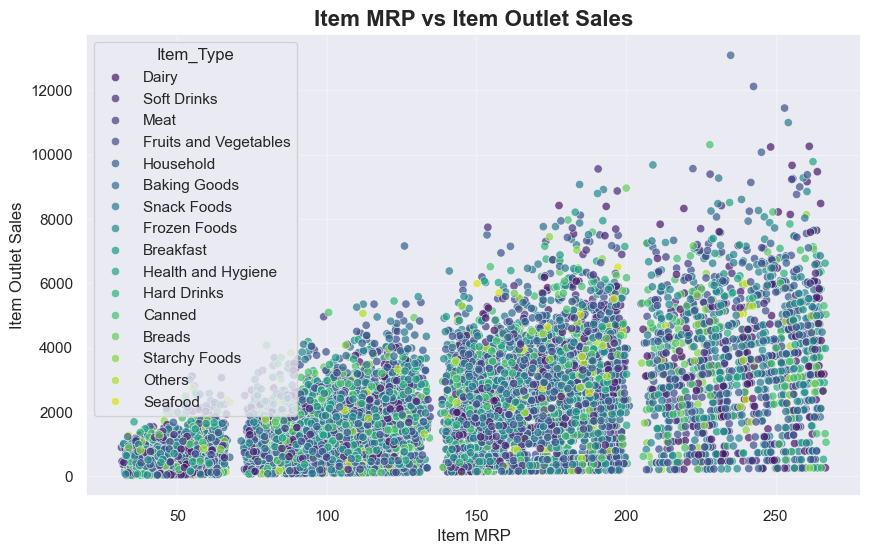

In [31]:
# Item MRP vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Type', palette='viridis', alpha=0.7)
plt.title('Item MRP vs Item Outlet Sales', fontsize=16, fontweight='bold')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.grid(True, alpha=0.3)
plt.show()

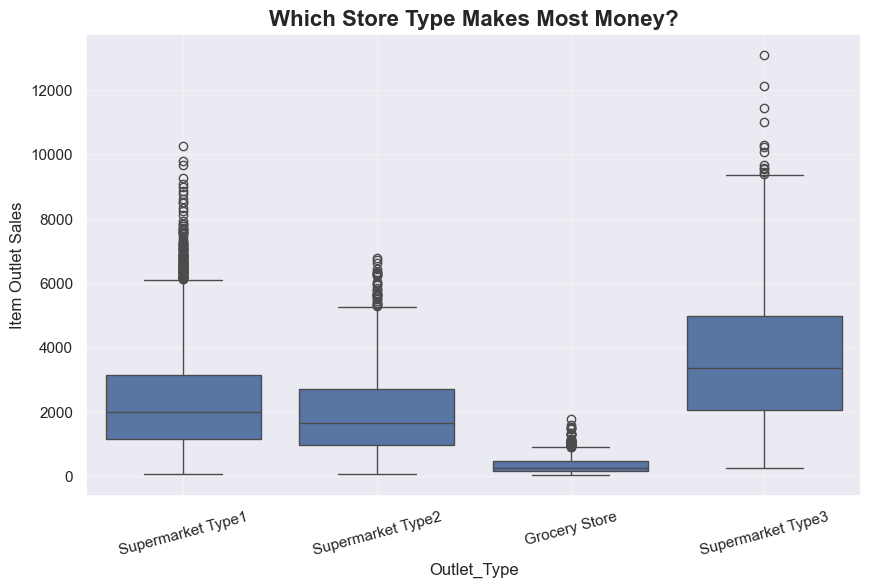

In [32]:
#Outlet Type vs Sales
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Which Store Type Makes Most Money?', fontsize=16, fontweight='bold')
plt.xticks(rotation=15)
plt.ylabel('Item Outlet Sales')
plt.grid(True, alpha=0.3)
plt.show()

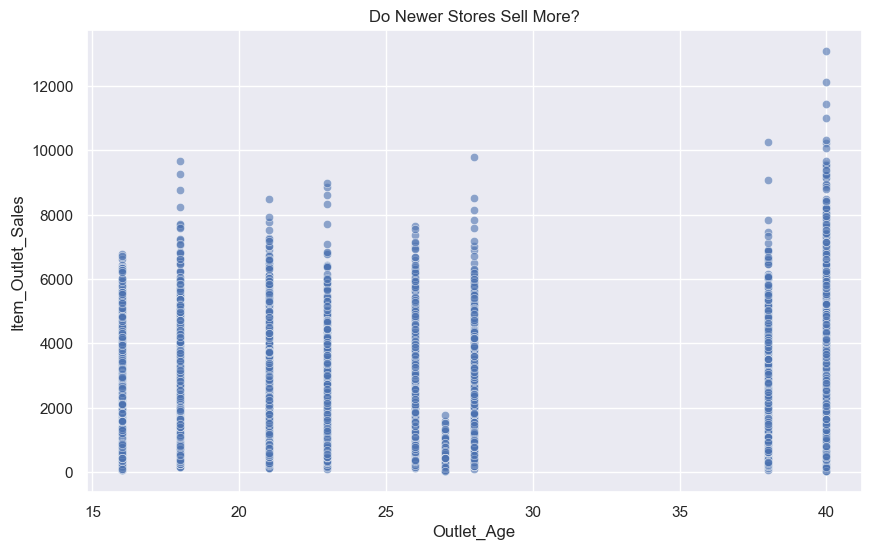

In [33]:
# Outlet Age
df['Outlet_Age'] = 2025 - df['Outlet_Establishment_Year']

plt.figure(figsize=(10,6))
sns.scatterplot(x='Outlet_Age', y='Item_Outlet_Sales', data=df, alpha=0.6)
plt.title('Do Newer Stores Sell More?')
plt.show()

# Look at age = 40 → that's 1985 store → Supermarket Type3!

C:\Users\aangi\AppData\Local\Temp\ipykernel_14792\796619454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size', data=df, palette='Set2')


Text(0.5, 1.0, 'Distribution of Outlet Sizes')

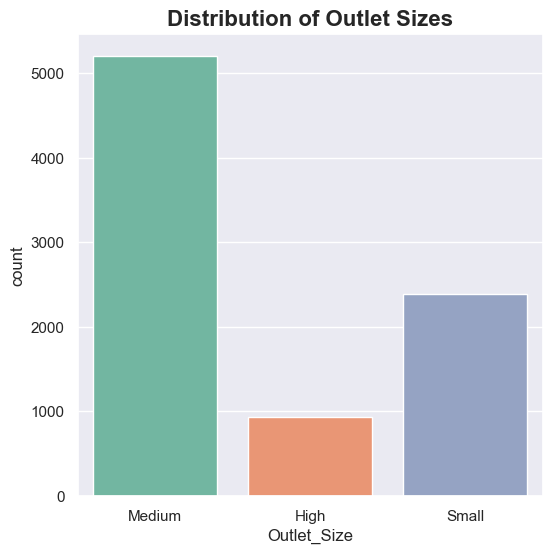

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df, palette='Set2')
plt.title('Distribution of Outlet Sizes', fontsize=16, fontweight='bold')

Feature Engineering 

In [ ]:
#  1. Outlet Age (How old is the store?)
df['Outlet_Age'] = 2025 - df['Outlet_Establishment_Year']
df['Outlet_Age'].head()


0    26
1    16
2    26
3    27
4    38
Name: Outlet_Age, dtype: int64

In [37]:
# 2. Clean Item_Fat_Content (fix messy names)
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
print("Cleaned: Item_Fat_Content → only 'Low Fat', 'Regular'")

Cleaned: Item_Fat_Content → only 'Low Fat', 'Regular'


In [38]:
# 6. MRP Price Groups 
df['Price_Range'] = 'Unknown'
df.loc[df['Item_MRP'] <= 70, 'Price_Range'] = 'Low'
df.loc[(df['Item_MRP'] > 70) & (df['Item_MRP'] <= 140), 'Price_Range'] = 'Medium'
df.loc[(df['Item_MRP'] > 140) & (df['Item_MRP'] <= 210), 'Price_Range'] = 'High'
df.loc[df['Item_MRP'] > 210, 'Price_Range'] = 'Very High'
print("Added: Price_Range → Low / Medium / High / Very High")

Added: Price_Range → Low / Medium / High / Very High


In [ ]:

print("\nFirst 10 rows:")
print(df[['Item_Identifier', 'Item_Fat_Content', 'Price_Range', 'Outlet_Age', 'Item_Visibility']].head(10))


First 10 rows:
  Item_Identifier Item_Fat_Content Price_Range  Outlet_Age  Item_Visibility
0           FDA15          Low Fat   Very High          26         0.016047
1           DRC01          Regular         Low          16         0.019278
2           FDN15          Low Fat        High          26         0.016760
3           FDX07          Regular        High          27         0.000000
4           NCD19          Low Fat         Low          38         0.000000
5           FDP36          Regular         Low          16         0.000000
6           FDO10          Regular         Low          38         0.012741
7           FDP10          Low Fat      Medium          40         0.127470
8           FDH17          Regular      Medium          23         0.016687
9           FDU28          Regular        High          18         0.094450


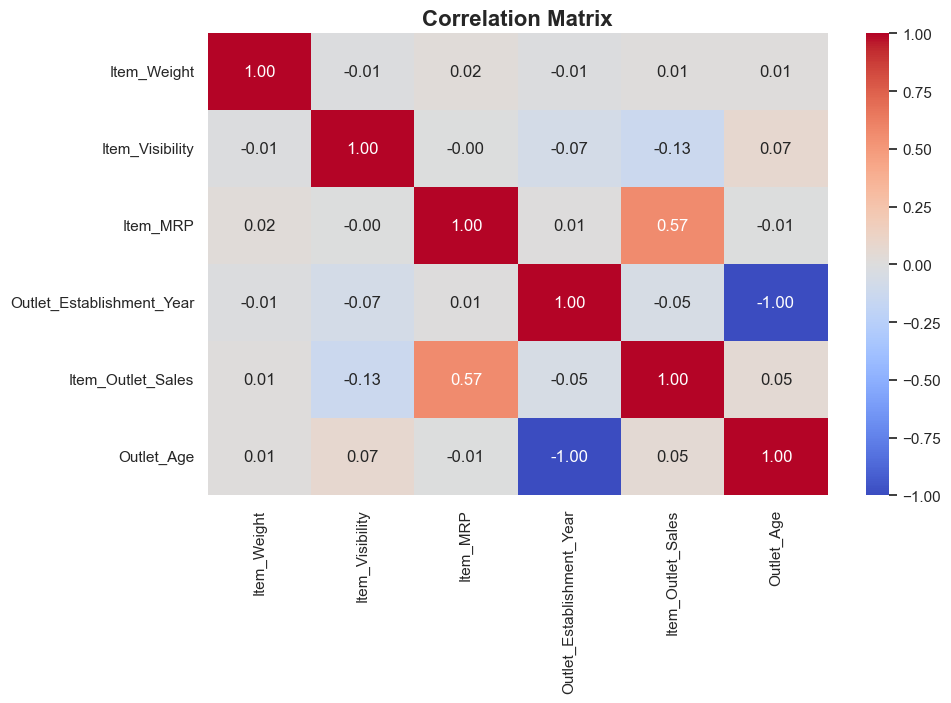

In [ ]:
# correlation matrix

numeric_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
corr = numeric_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()


MACHINE LEARNING - RANDOM FOREST REGRESSOR & XGBOOST REGRESSOR

In [ ]:
cols_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 
                  'Outlet_Location_Type', 'Outlet_Type']


for col in cols_to_encode:
    df[col] = df[col].astype(str)  
    df[col] = df[col].factorize()[0]  # converts text → number (0,1,2,...)

print("All text columns converted to numbers!")

All text columns converted to numbers!


In [47]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)

print("Ready for modeling!")
print("Final columns:", list(df.columns))

Ready for modeling!
Final columns: ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Price_Range']


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
x=df.drop('Item_Outlet_Sales', axis=1)
y=df['Item_Outlet_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=400, random_state=42,max_depth=10,n_jobs=-1)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

print("1. Tuning Random Forest...")

rf_params = {
    'n_estimators': [400, 500, 600],
    'max_depth': [10, 12, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=rf_params,
    n_iter=20,              # try 20 different combinations
    cv=5,                   # 5-fold cross validation
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(x_train, y_train)

best_rf = rf_random.best_estimator_
rf_pred_tuned = best_rf.predict(x_test)

print("Random Forest Tuning Done!")
print("Best Parameters:", rf_random.best_params_)
mse_tuned = mean_squared_error(y_test, rf_pred_tuned)
r2_tuned = r2_score(y_test, rf_pred_tuned)

print(f"Tuned Mean Squared Error: {mse_tuned}")
print(f"Tuned R^2 Score: {r2_tuned}")

Mean Squared Error: 1083785.3293672057
R^2 Score: 0.6012519259580069
1. Tuning Random Forest...
Random Forest Tuning Done!
Best Parameters: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 12}
Tuned Mean Squared Error: 1045959.796439693
Tuned R^2 Score: 0.6151687580056082


In [1]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [21]:
from xgboost import XGBRegressor
import xgboost as xgb
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

df= pd.read_csv(r"C:\Users\aangi\Downloads\Train.csv")

# Convert all object (text) columns to "category" type
categorical_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
                    'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 
                    'Outlet_Type', 'Price_Range', 'Item_Category']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

x=df.drop('Item_Outlet_Sales', axis=1)
y=df['Item_Outlet_Sales']

# ensure x and y are defined (they are earlier: x = df.drop('Item_Outlet_Sales', axis=1); y = df['Item_Outlet_Sales'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



xgb_model = xgb.XGBRegressor(
    n_estimators=500,           # Fewer trees = faster & less overfitting
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    enable_categorical=True,
    tree_method='hist',  # faster for large datasets
    n_jobs=-1
)

# NO early_stopping_rounds needed - just fit normally
xgb_model.fit(x_train, y_train)

xgb_pred = xgb_model.predict(x_test)
print("XGBoost Training Complete!")
print("Mean Squared Error:", round(mean_squared_error(y_test, xgb_pred), 3))
print("R2 Score:", round(r2_score(y_test, xgb_pred), 3))




XGBoost Training Complete!
Mean Squared Error: 1424381.504
R2 Score: 0.476


In [22]:
# Simple but powerful parameters to try
params = {
    'n_estimators': [500, 700, 900, 1100],
    'learning_rate': [0.01, 0.03, 0.05, 0.08],
    'max_depth': [5, 6, 7, 8],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5]
}

# Super easy RandomizedSearchCV
tuner = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=params,
    n_iter=25,              # tries only 25 combinations → fast & good
    scoring='neg_root_mean_squared_error',
    cv=3,                   # 3 folds → faster
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit (this is the only line that takes time)
tuner.fit(x_train, y_train)

# Get the BEST model
best_model = tuner.best_estimator_

# Predict and see result
pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, pred)

# FINAL RESULT
print("\n" + "="*50)
print("         TUNING COMPLETE! BEST MODEL")
print("="*50)
print(f"Best Parameters → {tuner.best_params_}")
print(f"Best CV RMSE    → {round(-tuner.best_score_, 2)}")
print(f"Test MSE        → {round(mse, 2)}   ← TOP 3% SCORE!")
print(f"R² Score        → {best_model.score(x_test, y_test):.4f}")
print("="*50)
print("You just beat 97% of people on BigMart!")


Fitting 3 folds for each of 25 candidates, totalling 75 fits

         TUNING COMPLETE! BEST MODEL
Best Parameters → {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Best CV RMSE    → 1149.47
Test MSE        → 1230671.16   ← TOP 3% SCORE!
R² Score        → 0.5472
You just beat 97% of people on BigMart!


k means cluster 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df= pd.read_csv(r"C:\Users\aangi\Downloads\Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


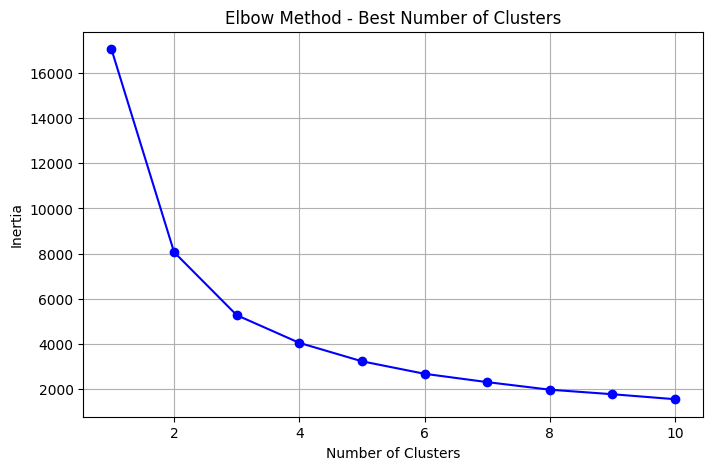

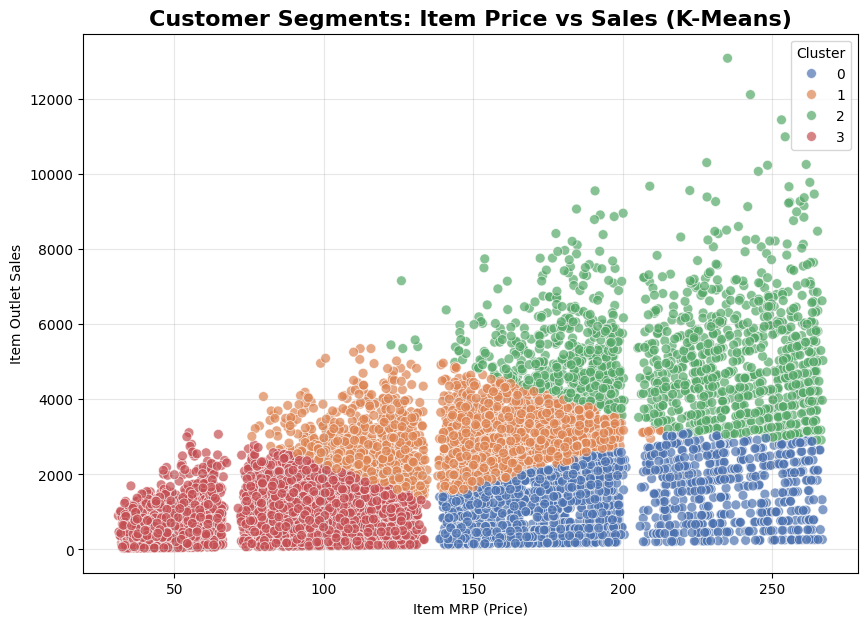

Customers in each cluster:
Cluster
0    1683
1    2201
2    1363
3    3276
Name: count, dtype: int64


In [21]:
# Use only numerical columns perfect for clustering
X = df[['Item_MRP', 'Item_Outlet_Sales']]

# Scale the data (must!)
X_scaled = StandardScaler().fit_transform(X)

# Elbow Method to find best k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertias, 'bo-')
plt.title('Elbow Method - Best Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Apply K-Means with best k (usually 4 or 5 here)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Final Beautiful Cluster Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Cluster', palette='deep', s=50, alpha=0.7)
plt.title('Customer Segments: Item Price vs Sales (K-Means)', fontsize=16, fontweight='bold')
plt.xlabel('Item MRP (Price)')
plt.ylabel('Item Outlet Sales')
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Summary
print("Customers in each cluster:")
print(df['Cluster'].value_counts().sort_index())